In [111]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [112]:
def u_law(u, inp):
    return np.sign(inp) * np.log(1 + (u * np.abs(inp))) / np.log(1 + u)

def rounding(value):
    answer = mt.floor(value) + mt.ceil(value)
    return answer / 2

def Uniform_quantizater(input, level):
    step_size = 2 * max(input) / (level- 1)
    Quantized_signal = [rounding(i / step_size) * step_size for i in input]
    return Quantized_signal

def binary(L,N):
    code=[]
    for i in range(L):
        num=i
        code_word=""
        for j in range(N):
            if num&(1<<j)==0:
                code_word+="0"
            else:
                code_word+="1"
        code.append(code_word)
    return code

In [113]:
A = 2
fm = 10 # Signal frequency 
Tsig = 1 / fm #Time Period for Signal
t = np.arange(0, 2 * Tsig, 0.01 * Tsig) #Plotting points for time 

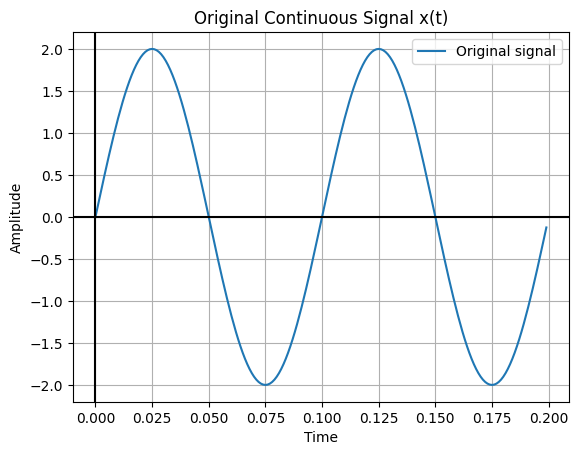

In [114]:
#Input Signal
x = A * np.sin(2 * np.pi * fm * t)  #Equation for the input signal
plt.plot(t,x)                         #Plotting of the original signal
plt.title("Original Continuous Signal x(t)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0,color = 'black' )
plt.legend(['Original signal'])
temp_sig=[i for i in x] #making a copy of the original signal
x_org=[i for i in x]    #making a copy of the original sigm

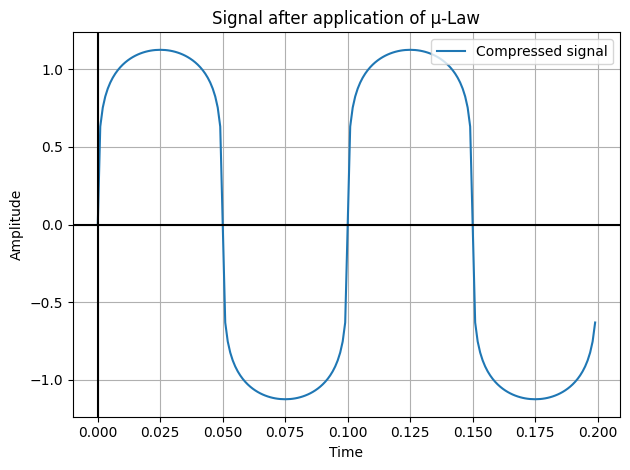

In [115]:
#μ-Law
u = 255 #Standard value
x_com = u_law(u,temp_sig) #Equation for the compressed signal

plt.plot(t,x_com)   #Plotting of the compressed signal
plt.title("Signal after application of μ-Law")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(['Compressed signal'], loc = 'upper right')
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.tight_layout()
plt.show()

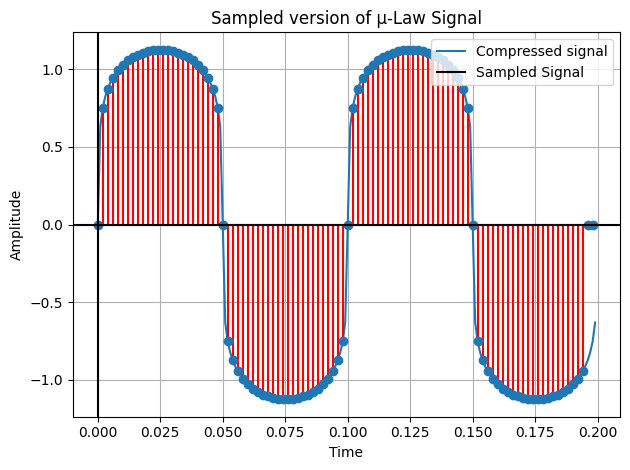

In [116]:
M = 50 #Nyquist Constant 
fs = M * fm  #Sampling Frequency
ts = np.arange(0 ,2 * Tsig ,1 / fs)
x_s = np.zeros(len(ts)) #This is the make a list of the same length as the compressed signal
for i in range(len(ts) - int(100 / M)):
    x_s[i] = x_com[i * int(100 / M)] #Sampled signal

plt.plot(t ,x_com)      #Plotting of the compressed signal
plt.stem(ts ,x_s,"r")   #Plotting of the sampled signal
plt.title("Sampled version of μ-Law Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.grid(True)
plt.axhline(y = 0, color = 'black')
plt.axvline(x = 0, color = 'black')
plt.legend(['Compressed signal', 'Sampled Signal'], loc = 'upper right')
plt.tight_layout()
plt.show()

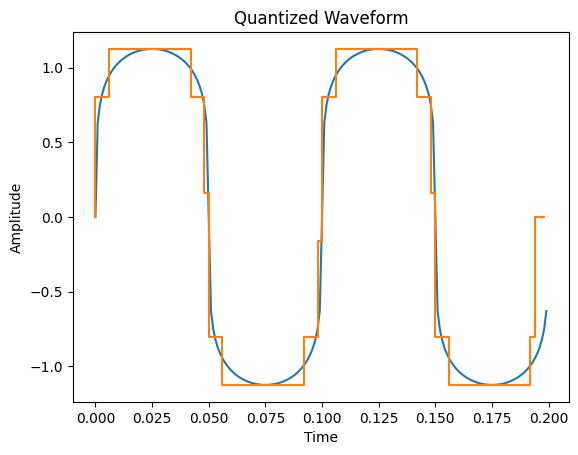

In [127]:
#Quantisation
n = 3  #Bits
level = 2 ** n   #Levels
delta = 2 * max(x_com) / level

x_qnt = Uniform_quantizater(x_s, level)

plt.plot(t,x_com)
plt.step(ts,x_qnt)
plt.title("Quantized Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [119]:
X_code = binary(level,n)
X_code

['000', '100', '010', '110', '001', '101', '011', '111']

In [132]:
pcm=""
a = []
s = 0
for i in range(len(x_qnt)):
    index=mt.floor((x_qnt[i]-(-A))/delta)
    s+=1
print(s)
print(len(X_code))
#  pcm+=X_code[index]

# print(pcm)
# pcm_sig=[int(i) for i in list(pcm)]
# print(pcm_sig)

# plt.step(np.arange(0,len(pcm_sig)),pcm_sig)
# plt.title("Encoded PCM Wave")
# plt.ylabel("Amplitude")
# plt.xlabel("Time")

100
8
